In [2]:
from arch.bootstrap import SPA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1

## wrt HRP

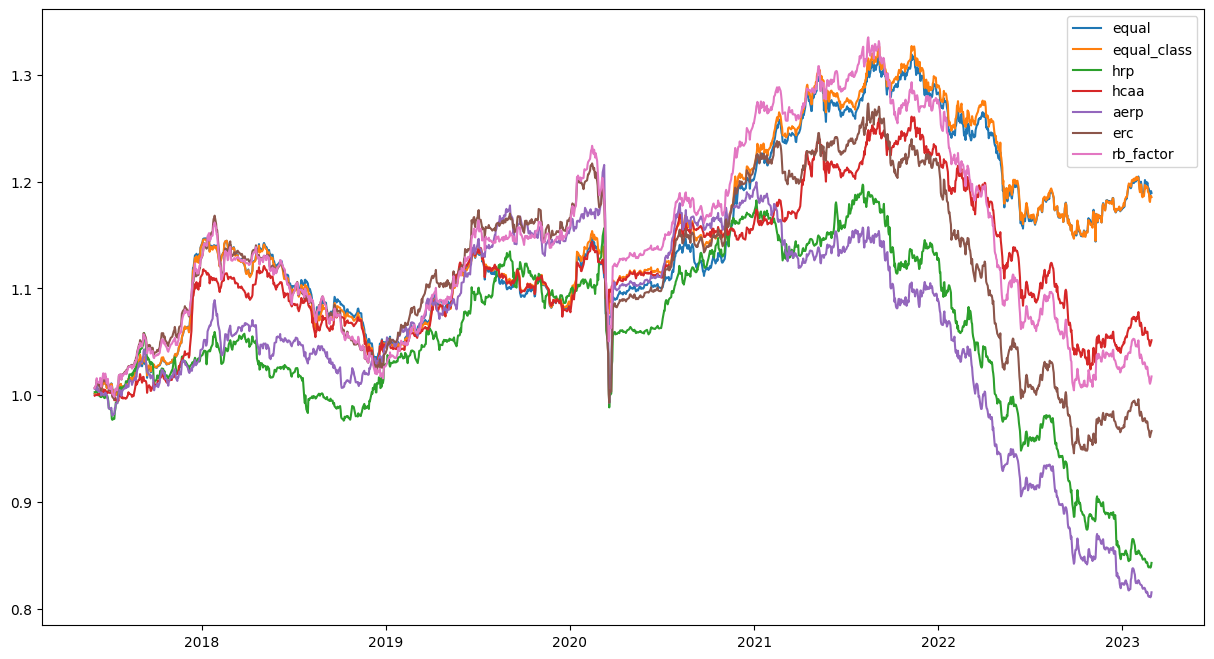

In [3]:
perf_dir = "performance/test_final_models/nmf/dataset1_20230518_160622"
returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)
plt.figure(figsize=(15,8))
plt.plot(np.cumprod(returns + 1))
plt.legend(returns.columns)
plt.show()

## SPA full model set

In [4]:
spa = SPA(-returns["hrp"], -returns.drop("hrp", axis=1), block_size=60, bootstrap="stationary", seed=1234)
spa.compute()
print(spa.better_models())
print(spa.critical_values())
print(spa.pvalues)

['equal', 'equal_class']
lower         0.000193
consistent    0.000193
upper         0.000193
dtype: float64
lower         0.043
consistent    0.043
upper         0.043
dtype: float64


## SPA NMF model set

In [5]:
spa = SPA(-returns["hrp"], -returns[["aerp", "rb_factor"]], 
          block_size=60, bootstrap="stationary", seed=1234)
spa.compute()
print(spa.better_models())
print(spa.critical_values())
print(spa.pvalues)

[]
lower         0.000131
consistent    0.000131
upper         0.000131
dtype: float64
lower         0.083
consistent    0.084
upper         0.084
dtype: float64


# Dataset 2


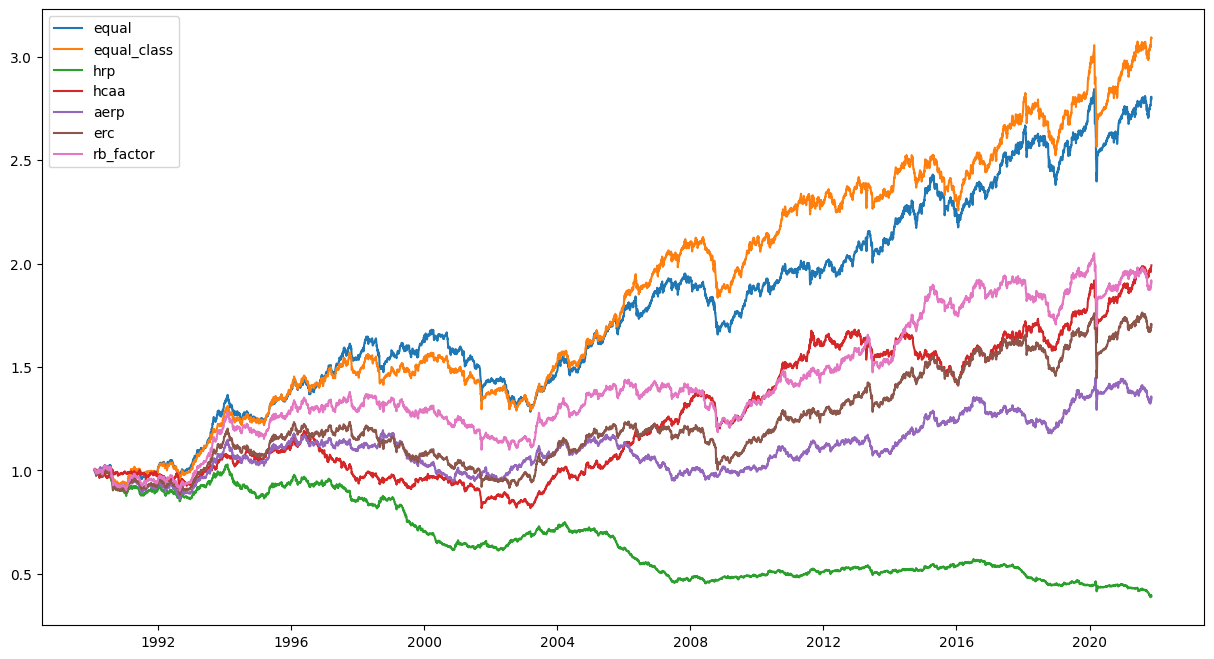

In [6]:
perf_dir = "performance/test_final_models/nmf/dataset2_20230518_160843"
returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)

plt.figure(figsize=(15,8))
plt.plot(np.cumprod(returns + 1))
plt.legend(returns.columns)

## SPA full model set

In [7]:
spa = SPA(-returns["hrp"], -returns.drop("hrp", axis=1), block_size=60, bootstrap="stationary", seed=1234)
spa.compute()
print(spa.better_models())
print(spa.critical_values())
print(spa.pvalues)

['equal', 'equal_class', 'hcaa', 'aerp', 'erc', 'rb_factor']
lower         0.000108
consistent    0.000108
upper         0.000108
dtype: float64
lower         0.0
consistent    0.0
upper         0.0
dtype: float64


## SPA NMF model set

In [8]:
spa = SPA(-returns["hrp"], -returns[["aerp", "rb_factor"]], block_size=60, bootstrap="stationary", seed=1234)
spa.compute()
print(spa.better_models())
print(spa.critical_values())
print(spa.pvalues)

['aerp', 'rb_factor']
lower         0.000067
consistent    0.000067
upper         0.000067
dtype: float64
lower         0.0
consistent    0.0
upper         0.0
dtype: float64
